# LDA (Linear Discriminant Analysis)

LDA là một phương pháp giảm số chiều dữ liệu (dimensionality reduction) cho bài toán classification.

Nên LDA cũng là 1 phương pháp phân lớp (classification).

Ta nhắc lại:

PCA là phương pháp giảm số chiều dữ liệu sao cho lượng thông tin về liệu (tổng phương sai) được giữ lại nhiều nhất.

Nhưng trong một số trường hợp thì ta chỉ cần lưu giữ thông tin cần thiết riêng.




Tham khảo:

https://towardsdatascience.com/linear-discriminant-analysis-an-introduction-50230ba7dadb

https://medium.com/journey-2-artificial-intelligence/lda-linear-discriminant-analysis-using-python-2155cf5b6398

within-class variance

between-class variance

LDA tìm phép chiếu sao cho tỉ lệ giữa between-class variance và within-class variance lớn nhất có thể.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from sklearn import datasets

from sklearn.decomposition import PCA
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target
target_names = iris_dataset.target_names


In [10]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)


In [11]:
#
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

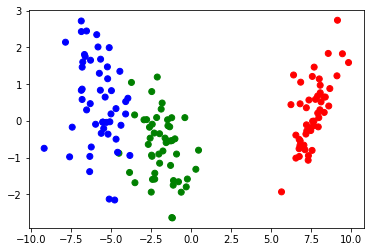

In [18]:
# Tạo 1 vector color
color = ['r', 'g', 'b']
vector_color = np.vectorize(lambda x: color[x % len(color)])

# maping color and plot
plt.scatter(X_r2[:, 0], X_r2[:, 1], c = vector_color(y))

In [20]:
# So sánh PCA
pca = PCA(n_components= 4)
X_r = pca.fit(X).transform(X)

In [21]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

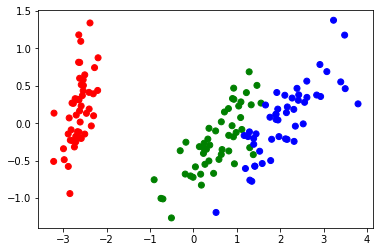

In [22]:
# Tạo 1 vector color
color = ['r', 'g', 'b']
vector_color = np.vectorize(lambda x: color[x % len(color)])

# maping color and plot
plt.scatter(X_r[:, 0], X_r[:, 1], c = vector_color(y))

# LDA as a classifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [26]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
# Train
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis(n_components=2)

In [36]:
# explained_variance_ratio_
lda.explained_variance_ratio_

array([0.98763589, 0.01236411])

In [30]:
# 
x_test_r2 = lda.transform(X_test)
x_test_r2

In [ ]:
# x_test_r2 có thể là input đầu nào của 1 model nào đó

In [32]:
# Predict
y_pred = lda.predict(X_test)
y_pred


array([2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1])

In [35]:
# Accurancy
(y_test == y_pred).sum()/y_test.shape[0]

0.9736842105263158

In [ ]:
# C=

# Combining LDA vs PCA

In [37]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target

In [38]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# PCA 
pca = PCA(n_components= 4)
X_r = pca.fit(X).transform(X)

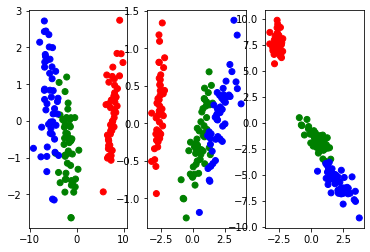

In [41]:
plt.subplot(1,3,1)
plt.scatter(X_r2[:, 0], X_r2[:, 1], c = vector_color(y))

plt.subplot(1,3,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c = vector_color(y))

# Combinning LDA - PCA
plt.subplot(1,3,3)
plt.scatter(X_r[:, 0], X_r2[:, 0], c = vector_color(y))

In [ ]:
# https://towardsdatascience.com/linear-discriminant-analysis-an-introduction-50230ba7dadb
# Dataset

# Model 1
# --> Chạy thử model (KNN) -> accurancy ( metric )

# Model 2
# --> LDA/PCA/SVD: -> accurancy ( metric )

# Model 3
# --> LDA/PCA/SVD (preprocessing). -> dataset transform.
# ------> dataset transform -> train model (KNN) ---> accurancy ( metric )

# Bài tập

In [ ]:
1. Chạy model LDA (số chiều tự chọn) cho dataset MNIST (sklearn.datasets.load_digits)
 # In ra các thông số: explained_variance_ratio_,
 # In ra Accuracy.
 # Chọn số chiều sao cho acc cao.
2. Chọn 1 model classifier (bất kì) để chạy dataset đã được transform từ LDA trên.and
 # So sánh accuracy với 1.